Считываем книгу

In [202]:
f = open('book.txt', 'r', encoding="utf-8")
text = f.read()
f.close()

Токенизируем при помощи nltk, удаляем знаки препинания

In [187]:
import nltk
from nltk.tokenize import word_tokenize
fwords = [w.lower() for w in word_tokenize(text) if w.isalpha()]

Считываем и обрабатываем все возможные граммемы и категории, создаем список

In [86]:
f = open("gram.txt", 'r', encoding='utf-8')
gram = f.read()
f.close()
d = {}
val = ''
al = []
bal = []
gram_lines = gram.split('\n')
for line in gram_lines:
    words = line.split('\t')
    if words[4] == '—':
        if words[1] == 'POST':
            al.append (words[1])
        else:
            al.append(v)
            bal.append(al)
            al = []
            al.append(words[1])
        v = []
        val = words[1]
    else:
        v.append(words[1])
    d[words[1]] = val
    
for i in bal:
    if i[1] == []:
        i[1].append(i[0])



Анализируем при помощи pymorphy, создаем список словарей, каждый словарь - строчка, создаем базу

In [203]:
from pymorphy2 import MorphAnalyzer
import pandas as pd
morph = MorphAnalyzer()
l = fwords
r =[]
a = {}
for word in l:
    anali = morph.parse(word)
    a['word'] = anali[0].word
    a['lex'] = anali[0].normal_form
    
    an = str(anali[0].tag)
    an1 = an.replace(' ', ',')
    grams = an1.split (',')
    
    
    for i in bal:
        fl = 0
        for one in grams:
            if one in i[1]:
                a[i[0]] = one
                fl = 1
                break
        if fl == 0:
            a[i[0]] = ''
    r.append(a)
    a = {}

df = pd.DataFrame(r)

df = df[['word', 'lex', 'POST', 'ANim', 'ASpc', 'Abbr', 'Adjx', 'Af-p', 'Anph', 'Anum', 'Apro', 'Arch', 'CAse', 'Cmp2', 
         'Coll', 'Coun', 'Dist', 'Dmns', 'Erro', 'Fimp', 'Fixd', 'GNdr', 'Geox', 'INvl', 'Impe', 'Impx', 'Infr', 'Init', 'Inmx', 'Litr', 'MOod', 'Ms-f', 'Mult', 'NMbr', 'Name', 'Orgn', 'PErs', 'Patr', 'Pltm', 'Poss', 'Prdx', 'Prnt', 'Qual', 'Ques', 'Refl', 'Sgtm', 'Slng', 'Subx', 'Supr', 'Surn', 'TEns', 'TRns', 'Trad', 'V-be', 'V-bi', 'V-ej', 'V-en', 'V-ey', 'V-ie', 'V-oy', 'V-sh', 'VOic', 'Vpre']]
df

,word,lex,POST,ANim,ASpc,Abbr,Adjx,Af-p,Anph,Anum,...,V-be,V-bi,V-ej,V-en,V-ey,V-ie,V-oy,V-sh,VOic,Vpre
0,глава,глава,NOUN,anim,,,,,,,...,,,,,,,,,,
1,i,i,,,,,,,,,...,,,,,,,,,,
2,в,в,PREP,,,,,,,,...,,,,,,,,,,
3,которой,который,ADJF,,,,,,Anph,,...,,,,,,,,,,
4,автор,автор,NOUN,anim,,,,,,,...,,,,,,,,,,
5,знакомит,знакомить,VERB,,impf,,,,,,...,,,,,,,,,,
6,читателя,читатель,NOUN,anim,,,,,,,...,,,,,,,,,,
7,с,с,PREP,,,,,,,,...,,,,,,,,,,
8,героем,герой,NOUN,anim,,,,,,,...,,,,,,,,,,
9,и,и,CONJ,,,,,,,,...,,,,,,,,,,


Количество вхождений по родам (учитываются слова, у которых есть род), барплот из семинара

Text(0, 0.5, 'number of entries')

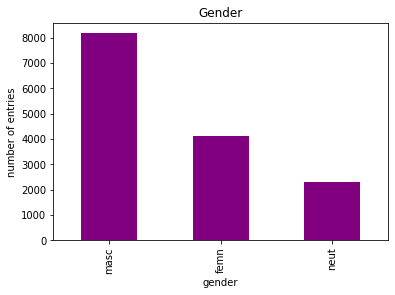

In [194]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
random.seed = 23
df2 = df[
    (df['GNdr'] != '') & (df['GNdr'] != 'мж')
]
df2['GNdr'].value_counts().plot.bar(color='purple');
plt.title('Gender')
plt.xlabel('gender')
plt.ylabel('number of entries')

Количество вхождений по родам (учитываются слова, у которых есть род), пайчарм из семинара

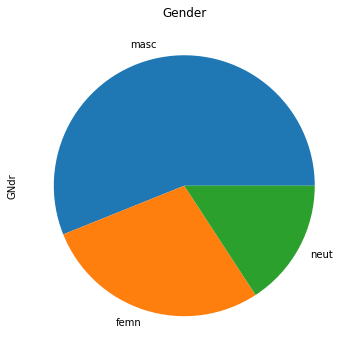

In [195]:
plt.figure(figsize=(6, 6))
df2['GNdr'].value_counts().plot(kind='pie');
plt.title('Gender');

Гистограмма из семинара, длина всех слов

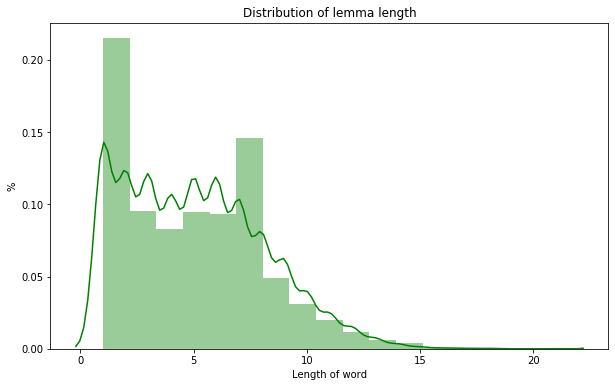

In [196]:
df['length'] = df['lex'].apply(len)
plt.figure(figsize=(10, 6))
sns.distplot(df['length'], bins=17, color='green')
plt.title('Distribution of lemma length')
plt.ylabel('%')
plt.xlabel('Length of word');

Количество вхождений местоимений по Oy, по Ox число, разными цветами обозначены лица. Одновременно распределено по числу и лицу (поэтому использовался такой график). Из графика видно, что значительно преобладает 1л едч, поэтому рассказчик, вероятно, участник событий

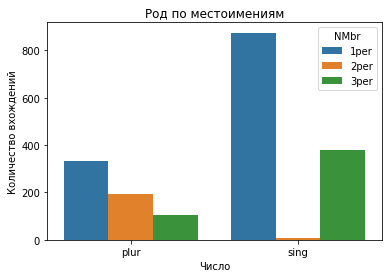

In [197]:
df3 = df[
    (df['PErs'] != '') & (df['POST'] == 'NPRO') 
][
    ['PErs', 'GNdr', 'NMbr']
].groupby(['NMbr', 'PErs'], as_index=False).count()

df3.columns = ['PErs', 'NMbr','total']
sns.barplot(x="PErs", y="total", hue='NMbr', data=df3)
plt.title('Род по местоимениям')
plt.xlabel('Число')
plt.ylabel('Количество вхождений');


Хочу посмотреть на соотношение времен, одна категория и не так много граммем, но количество вхождений высокое , поэтому, кмк, удобнее всего использовать пайчарт

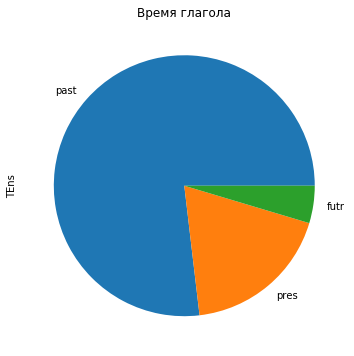

In [156]:
df4 = df [(df['POST'] == 'VERB') & (df['TEns'] != '') ]
plt.figure(figsize=(6, 6))
df4['TEns'].value_counts().plot(kind='pie');
plt.title('Время глагола');

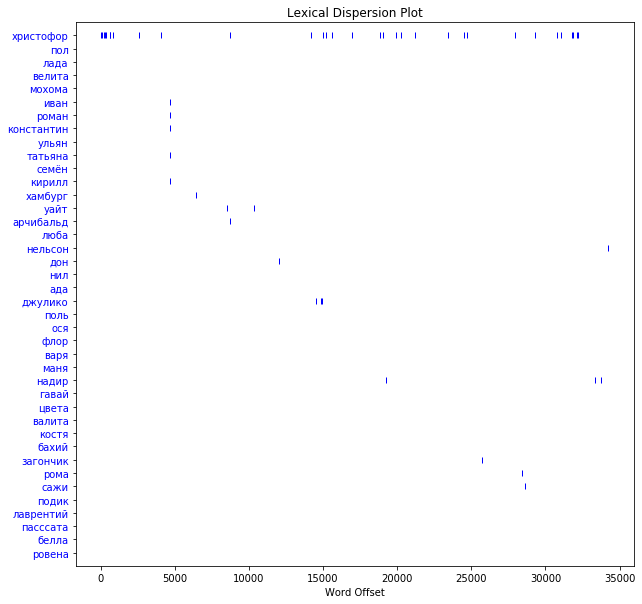

In [201]:
from nltk.draw.dispersion import dispersion_plot
wordi = df[df['Name'] != '']
names = wordi['lex'].tolist()
one_name = []
for i in names:
    if i in one_name:
        pass
    else:
        one_name.append(i)
plt.figure(figsize=(10, 10))
dispersion_plot(fwords, one_name)

 
